In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv("train1.csv")
test=pd.read_csv("test1.csv")

In [2]:
train= train.drop(train[(train['DeviceCategoryAOI'] == 'AOI_GOOD')&(train['DeviceCategoryDA']=='POPULATED_GOOD')&
                       (train['DeviceCategoryWB'] == 'BONDED_GOOD')].index)
test= test.drop(test[(test['DeviceCategoryAOI'] == 'AOI_GOOD')&(test['DeviceCategoryDA'] == 'POPULATED_GOOD')&
                       (test['DeviceCategoryWB'] == 'BONDED_GOOD')].index)

In [3]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [4]:
train['StripID']=enc.fit_transform(train[['StripID']])

In [5]:
test['StripID']=enc.fit_transform(test[['StripID']])

In [6]:
strip_train=train['StripID'].unique()
strip_test=test['StripID'].unique()

In [7]:
dcube_train=np.zeros((strip_train.size,16,4))

In [8]:
dcube_test=np.zeros((strip_test.size,16,4))

In [9]:
train['StripID']=train['StripID'].apply(int)
test['StripID']=test['StripID'].apply(int)

In [10]:
for index,row in train.iterrows():
        if (row['DeviceCategoryDA']!='POPULATED_GOOD'):
            dcube_train[row['StripID']][row['StripX']][row['StripY']]+=1
        #if (row['DeviceCategoryWB']!='BONDED_GOOD'):
            #dcube_train[row['StripID']][row['StripX']][row['StripY']]+=1
        #if (row['DeviceCategoryAOI']!='AOI_GOOD'):
            #dcube_train[row['StripID']][row['StripX']][row['StripY']]+=1

In [11]:
for index,row in train.iterrows():
        if (row['DeviceCategoryWB']!='BONDED_GOOD'):
            dcube_train[row['StripID']][row['StripX']][row['StripY']]+=1


In [12]:
for index,row in train.iterrows():
        if (row['DeviceCategoryAOI']!='AOI_GOOD'):
            dcube_train[row['StripID']][row['StripX']][row['StripY']]+=1


In [13]:
for index,row in test.iterrows():
        if (row['DeviceCategoryDA']!='POPULATED_GOOD'):
            dcube_test[row['StripID']][row['StripX']][row['StripY']]+=1
        #if (row['DeviceCategoryWB']!='BONDED_GOOD'):
        #    dcube_test[row['StripID']][row['StripX']][row['StripY']]+=1
        #if (row['DeviceCategoryAOI']!='AOI_GOOD'):
        #    dcube_test[row['StripID']][row['StripX']][row['StripY']]+=1

In [14]:
for index,row in test.iterrows():
        if (row['DeviceCategoryWB']!='BONDED_GOOD'):
            dcube_test[row['StripID']][row['StripX']][row['StripY']]+=1
        #else:
        #    dcube_train[row['StripID']][row['StripX']][row['StripY']]+=0

In [15]:
for index,row in test.iterrows():
        if (row['DeviceCategoryAOI']!='AOI_GOOD'):
            dcube_test[row['StripID']][row['StripX']][row['StripY']]+=1
        #else:
        #    dcube_train[row['StripID']][row['StripX']][row['StripY']]+=0

In [16]:
dcube_train

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 2., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [17]:
dcube_test

array([[[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 2., 2.]],

       ...,

       [[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [18]:
arr_train=dcube_train.reshape(948,64)
arr_test=dcube_test.reshape(241,64)

In [19]:
arr_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
#arr_train_df=pd.DataFrame(arr_train)
#arr_test_df=pd.DataFrame(arr_test)

In [21]:
#arr_train_df

In [22]:
#from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder()

In [23]:
#for c in arr_train_df.columns:
#    arr_train_df[c]=enc.fit_transform(arr_train_df[[c]])
#for c in arr_test_df.columns:
#    arr_test_df[c]=enc.fit_transform(arr_test_df[[c]])

In [24]:
#arr_train=arr_train_df.to_numpy()
#arr_test=arr_test_df.to_numpy()

In [25]:
import torch
from torch import nn
from torch.optim import Adam
import torch.optim as optim
from torch.utils.data import DataLoader

In [26]:
data_loader=torch.utils.data.DataLoader(dataset=arr_train,batch_size=32,shuffle=True)

In [27]:
class AutoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(64, 32),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 4),
            torch.nn.ReLU(),
            torch.nn.Linear(4, 2),
            #torch.nn.ReLU(),
            #torch.nn.Linear(6, 5),
            #torch.nn.ReLU(),
            #torch.nn.Linear(5, 4),
            #torch.nn.ReLU(),
            #torch.nn.Linear(4, 3),
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2, 4),
            torch.nn.ReLU(),
            torch.nn.Linear(4, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 16),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(32, 64),
            #torch.nn.ReLU(),
            #torch.nn.Linear(8, 9),
            #torch.nn.ReLU(),
            #torch.nn.Linear(9, 10),
            #torch.nn.ReLU(),
            #torch.nn.Linear(10, 11),
            #torch.nn.Sigmoid()
        )
    def encode(self, x):
        encoded = self.encoder(x)
        return encoded

    def decode(self, x):
        decoded = self.decoder(x)
        return decoded
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [28]:
learning_rate=0.001
model=AutoEncoder()
mse=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=5,verbose=True)

In [29]:
import math
num_epochs=40
total_samples= len(arr_train)
n_iterations=math.ceil(total_samples/32)
print(f'total {total_samples} n_iterations {n_iterations}')

total 948 n_iterations 30


In [30]:
outputs=[]
L=[]
for epoch in range(num_epochs):
    for step, x in enumerate(data_loader):
        recon=model(x.float())
        loss=mse(recon,x.float())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    L.append(loss.item())
    mean_loss=sum(L)/len(L)
    scheduler.step(mean_loss)
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.6f}')
    outputs.append((epoch,x,recon))

Epoch:1, Loss:0.232162
Epoch:2, Loss:0.834895
Epoch:3, Loss:0.087932
Epoch:4, Loss:0.307581
Epoch:5, Loss:0.057033
Epoch:6, Loss:0.064951
Epoch:7, Loss:0.028186
Epoch:8, Loss:0.066397
Epoch:9, Loss:0.043351
Epoch:10, Loss:0.049771
Epoch:11, Loss:0.124460
Epoch:12, Loss:0.034969
Epoch:13, Loss:0.036376
Epoch:14, Loss:0.036190
Epoch:15, Loss:0.054412
Epoch:16, Loss:0.049220
Epoch:17, Loss:0.041665
Epoch:18, Loss:0.051681
Epoch:19, Loss:0.132293
Epoch:20, Loss:0.038496
Epoch:21, Loss:0.041215
Epoch:22, Loss:0.101606
Epoch:23, Loss:0.125794
Epoch:24, Loss:0.048846
Epoch:25, Loss:0.120122
Epoch:26, Loss:0.043332
Epoch:27, Loss:0.203140
Epoch:28, Loss:0.043592
Epoch:29, Loss:0.036662
Epoch:30, Loss:0.107470
Epoch:31, Loss:0.109602
Epoch:32, Loss:0.035841
Epoch:33, Loss:0.028723
Epoch:34, Loss:0.038559
Epoch:35, Loss:0.099681
Epoch:36, Loss:0.032246
Epoch:37, Loss:0.064683
Epoch:38, Loss:0.030237
Epoch:39, Loss:0.049197
Epoch:40, Loss:0.038656


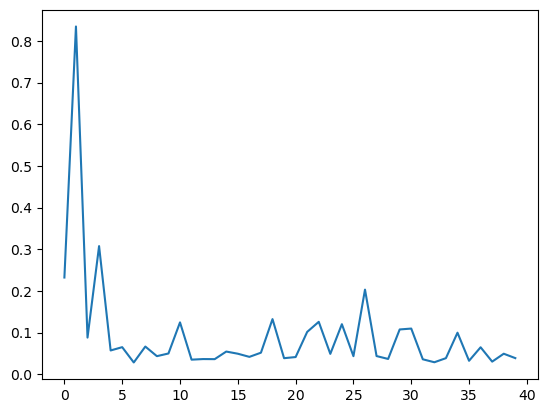

In [31]:
import matplotlib.pyplot as plt
plt.plot(L)

In [32]:
data_loader=DataLoader(dataset=arr_train,batch_size=len(arr_train))

In [33]:
for step, x in enumerate(data_loader):
    recon1=model.encode(x.float())

In [34]:
data_loader=DataLoader(dataset=arr_test,batch_size=len(arr_test))

In [35]:
for step, x in enumerate(data_loader):
    recon2=model.encode(x.float())

In [36]:
en1=recon1.detach().numpy()
en2=recon2.detach().numpy()

In [37]:
endf1 = pd.DataFrame(en1, columns = ['x','y'])
endf2 = pd.DataFrame(en2, columns = ['x','y'])

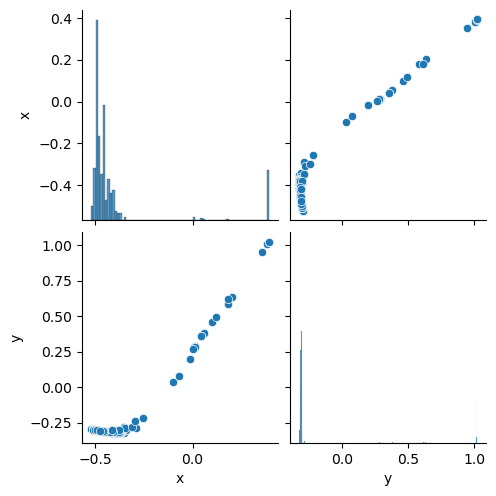

In [38]:
import seaborn as sns
sns.pairplot(endf1)

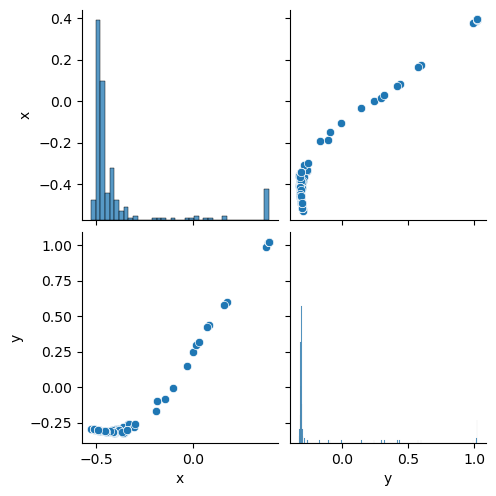

In [39]:
import seaborn as sns
sns.pairplot(endf2)

In [40]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [41]:
dbscan=DBSCAN(eps = 0.003, min_samples =5)
dbscan.fit(endf1[['x']],endf1[['y']])
#dbscan.fit(endf1[['x']])
endf1['dbs']=dbscan.labels_

In [42]:
dbscan.fit_predict(endf2[['x']],endf2[['y']])
#dbscan.fit_predict(endf2[['x']])
endf2['dbs']=dbscan.labels_

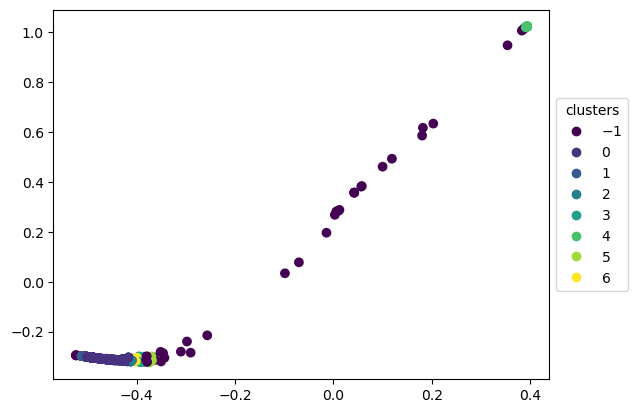

In [43]:
sc=plt.scatter(x=endf1['x'],y=endf1['y'],c=endf1['dbs'])
plt.legend(*sc.legend_elements(), title='clusters',loc='center left', bbox_to_anchor=(1, 0.5))

In [44]:
endf1.dbs.value_counts()

 0    765
 4     62
-1     39
 2     38
 1     16
 3     15
 5      8
 6      5
Name: dbs, dtype: int64

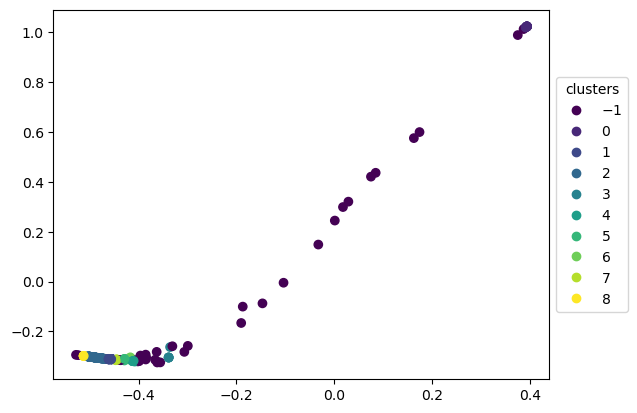

In [45]:
sc=plt.scatter(x=endf2['x'],y=endf2['y'],c=endf2['dbs'])
plt.legend(*sc.legend_elements(), title='clusters',loc='center left', bbox_to_anchor=(1, 0.5))

In [46]:
endf2.dbs.value_counts()

 2    112
 1     44
-1     35
 0     12
 6     10
 4      8
 3      5
 5      5
 7      5
 8      5
Name: dbs, dtype: int64